In [1]:
import numpy as np
import hickle as hkl
import pandas as pd

In [2]:
df = pd.read_csv("validation_data.csv")

In [6]:
np.max(df['tree_cover'])

100

In [66]:
n_px_total_positive = int(np.sum(df['tree_cover'] * 1.96))
n_px_total = len(df) * 196
n_px_total_negative = n_px_total - n_px_total_positive

strata = 'Urban'

n_px_strata = int(np.sum(df['tree_cover'][df['IPCC_Cover'] == strata]) * 1.96)
n_px_strata_map = n_px_strata - int(np.sum(df['error'][df['IPCC_Cover'] == strata]))


Wi = n_px_total_positive/n_px_total
nij = n_px_strata / n_px_total_positive
pij = Wi*nij
uhat = pij / nij
vu =  uhat*(1-uhat)/(np.sum(df['IPCC_Cover'] == strata) - 1)
np.sqrt(vu)
print(n_px_strata)

952


In [59]:
uhat

0.2541702649879551

In [ ]:
# What proportion o freference class J is mapped as class J, or what's the recall
# 1 - false negative rate


In [106]:
df['Map_class'] = 0.
df['Map_class'][df['tree_cover'] >= 1] = 1.
df['Map_class'][df['tree_cover'] >= 10] = 2.
df['Map_class'][df['tree_cover'] >= 20] = 3.
df['Map_class'][df['tree_cover'] >= 30] = 4.
df['Map_class'][df['tree_cover'] >= 40] = 5.
df['Map_class'][df['tree_cover'] >= 50] = 6.
df['Map_class'][df['tree_cover'] >= 60] = 7.

df['Ref_class'] = 0.
df['Ref_class'][df['y'] >= 1] = 1.
df['Ref_class'][df['y'] >= (196 * 0.1)] = 2.
df['Ref_class'][df['y'] >= (196 * 0.2)] = 3.
df['Ref_class'][df['y'] >= (196 * 0.3)] = 4.
df['Ref_class'][df['y'] >= (196 * 0.4)] = 5.
df['Ref_class'][df['y'] >= (196 * 0.5)] = 6.
df['Ref_class'][df['y'] >= (196 * 0.6)] = 7.

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [66]:
dfout = pd.DataFrame({'ref': [0] * ((len(df) * 196)),
                      'map': [0] * ((len(df) * 196)),
                      'strata': [0] * ((len(df) * 196))})

for i, val in df.iterrows():
    reference = [1] * val['y'] + [0] * (196 - val['y'])
    truepositives = [1] * val['tp']
    falsenegatives = [0] * val['fn']
    falsepositives = [1] * val['fp']
    others = [0] * (196 - val['tp'] - val['fn'] - val['fp'])
    mappred = truepositives + falsenegatives + falsepositives + others
    classi = [val['IPCC_Cover']] * 196
    #print(len(reference), len(mappred), len(classi))
    dfout.iloc[(i*196):(i+1)*196] = pd.DataFrame({'ref': reference,
                      'map': mappred,
                      'strata': classi})
    #for px in range(len(reference)):
    #    dfout.iloc[i*px] = {'ref': reference[i],
    #                  'map': mappred[i],
    #                  'strata': classi[i]}
dfout.to_csv("stehman.csv", index = False)

# UA PA figure

In [31]:
import pandas as pd
df = pd.read_csv("treecover_aridity.csv")
df = df[df.Subset == 'New3']
df.head(5)

,Category,Subset,Class,User,Producer,UserError,ProducerError
58,Southern Asia (*),New3,1-9%,0.0,0.0,0.0,0.0
59,South-Eastern / Eastern Asia (*),New3,1-9%,0.0,0.0,0.0,0.0
60,South America,New3,1-9%,53.0,68.0,1.8,1.5
61,Melanesia (*),New3,1-9%,0.0,0.0,0.0,0.0
62,Central America,New3,1-9%,73.0,68.0,3.8,4.5


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def grouped_barplot(df, cat,subcat, val , err, ax, ylab, xlab = '', legend = True):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    #plt.figure(figsize=(8, 8))
    if len(subx) > 1:
        for i,gr in enumerate(subx):
            dfg = df[df[subcat] == gr]
            ax.bar(x+offsets[i], dfg[val].values, width=width, 
                    label="{}".format(gr), yerr=dfg[err].values)#, ax = ax)
    else:
        #dfg = df[df[subcat] == subx]
        plt.bar(x, df[val].values, width=width, 
                    label="{}".format(subx), yerr=df[err].values)
    plt.xlabel(cat)
    plt.ylabel(val)
    ax.set_xticks(x)
    ax.set_xticklabels(u)
    if legend:
        ax.legend(loc = 'lower left')
    ax.set_ylim(0, 100)
    ax.set_xlabel(xlab)
    
    ax.set_ylabel(ylab)

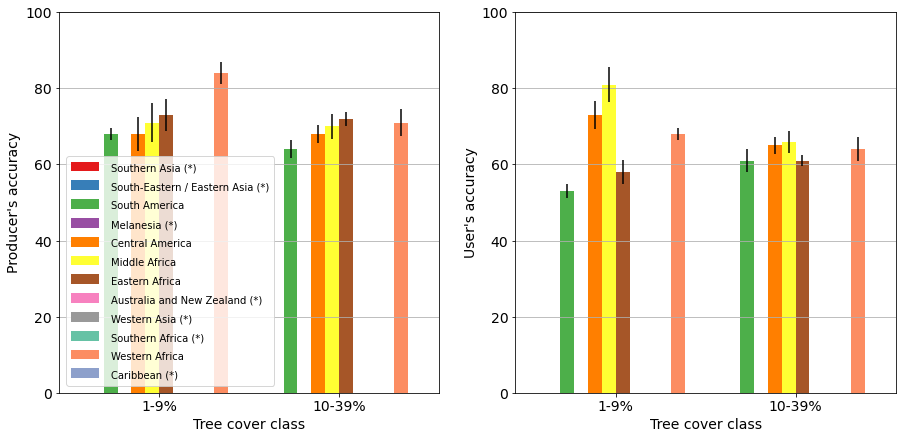

In [33]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors + plt.cm.Set2.colors)
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['khaki', 'green', 'red', 'yellowgreen', 'brown', 'teal'])#plt.cm.Accent.colors)
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['gainsboro', 'silver', 'grey', 'dimgray'])#plt.cm.Accent.colors)

#sns.set(style = 'white', font_scale=1.25)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors + plt.cm.Set2.colors)

  

fig, axs = plt.subplots(1, 2, figsize = (15, 7))
cat = "Class"
subcat = "Category"
val = "Producer"
err = "ProducerError"

# call the function with df from the question
grouped_barplot(df, cat, subcat, val, err , axs[0], "Producer's accuracy", "Tree cover class")
axs[0].grid(b = True, which = 'major', axis = 'y')
cat = "Class"
subcat = "Category"
val = "User"
err = "UserError"

grouped_barplot(df, cat, subcat, val, err , axs[1], "User's accuracy", "Tree cover class", False)
axs[1].grid(b = True, which = 'major', axis = 'y')
#plt.show()
plt.setp(axs[0].get_legend().get_texts(), fontsize='10')
plt.savefig("treecover_subregion_2.pdf", dpi = 200, tidy = True)

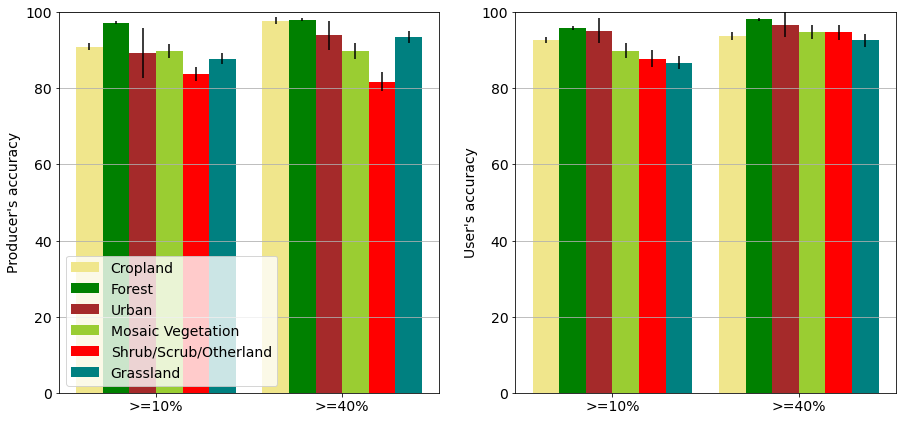

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("treecover_aridity.csv")
df = df[df.Subset == 'Land cover']


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['khaki', 'green', 'red', 'yellowgreen', 'brown', 'teal'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['khaki', 'green', 'brown', 'yellowgreen', 'red', 'teal'])
matplotlib.rcParams.update({'font.size': 14})


fig, axs = plt.subplots(1, 2, figsize = (15, 7))
cat = "Class"
subcat = "Category"
val = "Producer"
err = "ProducerError"

# call the function with df from the question
grouped_barplot(df, cat, subcat, val, err , axs[0], "Producer's accuracy")
axs[0].grid(b = True, which = 'major', axis = 'y')


cat = "Class"
subcat = "Category"
val = "User"
err = "UserError"

grouped_barplot(df, cat, subcat, val, err , axs[1], "User's accuracy", legend = False)
axs[1].grid(b = True, which = 'major', axis = 'y')
#plt.show()
plt.savefig("treecover_landcover.pdf", dpi = 200, tidy = True)

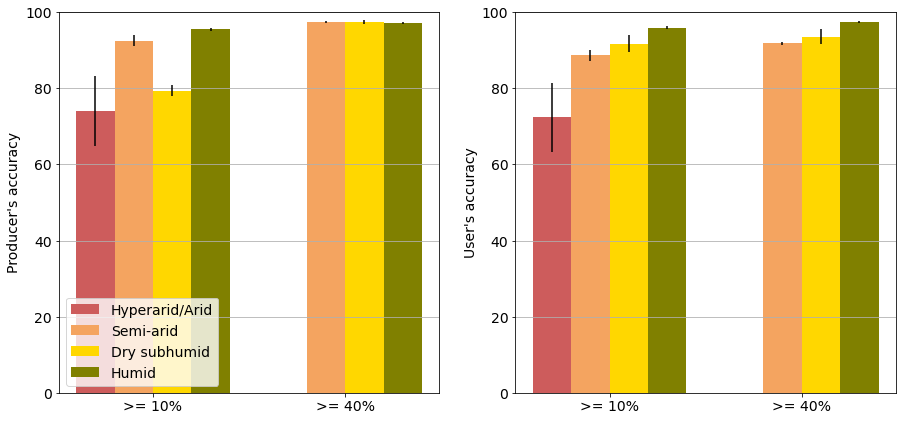

In [12]:
df = pd.read_csv("treecover_aridity.csv")
df = df[df.Subset == 'Aridity']
matplotlib.rcParams.update({'font.size': 14})

#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['gainsboro', 'silver', 'grey', 'dimgray'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['bisque', 'lightsalmon', 'darksalmon', 'indianred'])
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['indianred', 'sandybrown', 'gold', 'olive'])
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
cat = "Class"
subcat = "Category"
val = "Producer"
err = "ProducerError"

# call the function with df from the question
grouped_barplot(df, cat, subcat, val, err , axs[0], "Producer's accuracy")
axs[0].grid(b = True, which = 'major', axis = 'y')

cat = "Class"
subcat = "Category"
val = "User"
err = "UserError"

grouped_barplot(df, cat, subcat, val, err , axs[1], "User's accuracy", legend = False)
axs[1].grid(b = True, which = 'major', axis = 'y')
plt.savefig("treecover_aridity.pdf", dpi = 200, tidy = True)